In [1]:
%pylab inline
rcParams['figure.figsize'] = (9.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


# Programa del profe (algunas modificaciones)

In [1]:
def base_tiempos(t1=-2,t2=2,fm=44100):
    #Hay que muestrear al doble de la frecuencia
    T=t2-t1 #Periodo de análisis
    int_muestreo=1/fm #Distancia entre muestras
    num_mue_tot=T*fm
    
    #fm Frecuencia de muestreo

    tiempo = t1 + arange(num_mue_tot)/fm  #Por algún motivo queremos el intervalo abierto a la derecha
    return(tiempo)

def escalon(t,t0=0):
    """u(t-t0)"""
    j = zeros(len(t))
    i = ones(len(t))
    return(concatenate((j[t<t0],array((0.5,)),i[t>t0])))

def base_frecuencias(N=44100,fm=44100):
    """
    Calcula las frecuencias asociadas a una ventana de N muestras a una frecuencia de muestreo de fm
    """
    frecuencias = -fm / 2 + arange(N)*fm/N
    return(frecuencias)

def tono(tiempo, fr = 1000, amp = 1, fas = 0):
    signal = amp*cos(2*pi*fr*tiempo+fas)
    return(signal)

def ruido_blanco(tiempo, med = 0.0, sig = 1):
    ruido = random.normal(med,sig,tiempo.size)
    return(ruido)    

def gabor(tiempo, amp=1, frec=1000, tpos=0, sig=1, fas=0):
    tt = (tiempo - tpos) / sig
    signal = amp * tono(tiempo,frec,1.0,fas) * exp(-tt*tt)
    return(signal)

def escalon2(t):
    f = zeros(len(t))
    for i, el in enumerate(t):
        if t[i] > 0:
            f[i] = 1
        elif t[i] == 0:
            f[i] = 0.5
    return(f)

# Clase

In [3]:
tt = base_tiempos(-5, 5, 1024) #Período 10, fm =1024
ff = base_frecuencias(tt.size, 1024) 
ss = escalon(tt,0)

(-0.1, 1.1)

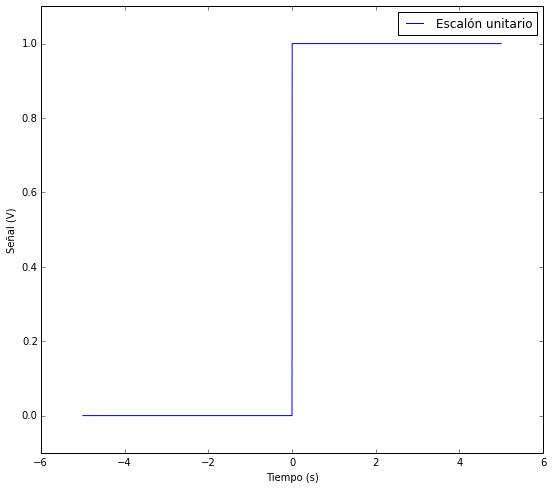

In [4]:
plot(tt, ss, label="Escalón unitario")
xlabel("Tiempo (s)")
ylabel("Señal (V)")
legend(loc="best")
ylim(-0.1,1.1)

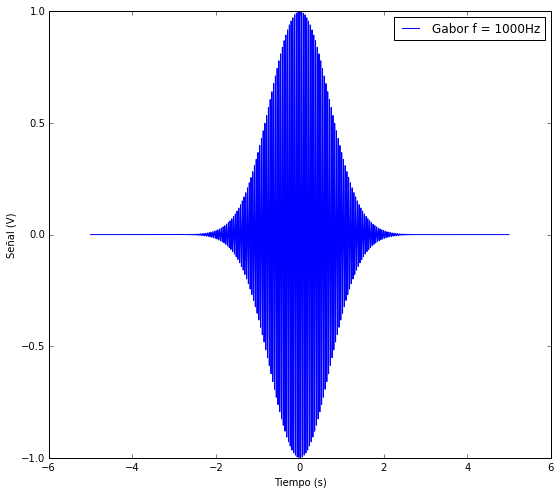

In [5]:
plot(tt, gabor(tt), label="Gabor f = 1000Hz")
xlabel("Tiempo (s)")
ylabel("Señal (V)")
legend(loc="best")

In [6]:
plot(tt, gabor(tt,fredata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAjAAAAHuCAYAAACBLTatAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzt3XeYVOXB/vF7G0gTEJWyi6CCdClq0CQqqGAgkRD1FU2iKJioiRpNYvSNMYhijy9RiTU2YqL8YgOFYAWNRoJGrGgQFWmCIkWalGV+fxyf3bOzZ54558w5U7+f6+Ka2dPm2dkdzr1PLUskEgkBAAAUkPJcFwAAACAoAgwAACg4BBgAAFBwCDAAAKDgEGAAAEDBIcAAAICCk9MAM27cOLVv3179+vVLecz555+v7t27q3///lqwYEEWSwcAAPJVTgPMGWecodmzZ6fcP2vWLC1evFgffPCB7rzzTp1zzjlZLB0AAMhXOQ0whx9+uNq2bZty/4wZMzR27FhJ0uDBg7V+/XqtXr06W8UDAAB5Kq/7wKxYsUKdO3eu+7qmpkbLly/PYYkAAEA+qMx1AdJJXumgrKys0THdunXThx9+mK0iAQCAGO2///5avHix9Zi8roGprq7WsmXL6r5evny5qqurGx334YcfKpFI8C+CfxMmTMh5GYrpH+9n+H+7diX03/8m1Lt3QpLzr1+/CZKc7YsW5b6Mhf6P30/ey3z956dSIq8DzKhRozR16lRJ0rx589SmTRu1b98+x6UCkA1PPSX16CFt21a/LfF1heyDD0oHHJCbcgHIDzltQjrllFP0wgsvaM2aNercubMmTpyoHTt2SJLOOussjRw5UrNmzVK3bt3UokUL3XvvvbksLoAsOf986RvfcJ7v2tV4/5YtzuMzz0jr1kknnZS9sgHIDzkNMA8++GDaY6ZMmZKFksAYMmRIrotQVHg/w7nlFmnCBOe5O8B06DBE77xTXxNz6qnS6tUEmLD4/YwO72X25XUTErKPD2G0eD/Dq61tvK1jxyENvi7nf7CM8PsZHd7L7Mv7UUgASsfEidLw4c5zr6YjMwixoqLh17/9rXTCCdJBB8VfxlK0xx57aN26dbkuBopQ27ZttXbt2lDnEmAA5I3LL5fefNN5bpqJ3DMnJG8zIeeaa6TPP5fuuisrxSw569atUyKRSH8gEJDX1Ch+UQELIK/4+f/M3Evd99QM/h8EUIAIMABybs0aadEi57kJIsmPyc+lxgHmX/+Kr4wA8gsBBkDOjRnjzPkieQcXI7kVI/nrb31L+vLL6MsHIP8QYADk3MaN9c9tNTDJ3B19zYiknTujLRuA/ESAAZBXTK2KCSRenXjpA4OoLFmyROXl5drlNewtIr/73e+01157qVOnTrG9RikiwADImc2bpT/+seE2r9FHyftsPv9cuuOOzMuGwvHQQw9p8ODBatmypdq3b69DDz1Ut912W66LJUlaunSp/u///k/vv/++Vq5cGdl1V61apVGjRqm6ulrl5eVaunRpg/3btm3TuHHj1Lp1a3Xs2FGTJ09usP+NN97QQQcdpBYtWujggw/Wm2b439cmT56sjh07qnXr1ho/fry2b99et69r16567rnnGhx/33336fDDD4/s+/ODAAMgZ+bMkS68sGFTUHKAsdXAuJmJ7+6/Xzr77OjLivx044036oILLtDFF1+s1atXa/Xq1br99tv18ssvN7jpZsNOj/bLpUuXql27dmrXrl2kr1VeXq6RI0fqkUce8dx/+eWX68MPP9TSpUs1Z84cXX/99XrqqackSdu3b9f3v/99nXbaaVq/fr3Gjh2r73//+3VL+Tz11FO67rrr9Pzzz+uTTz7RRx99pAlmamw5Q58zGf4cFQIMgJwxE9K5Z921hRSb5KYnFL8NGzZowoQJuu2223T88cerRYsWkqQBAwbogQceUJMmTSRJM2fO1MCBA9W6dWvts88+mjhxYqNr3X333aqurlanTp1044031m3ftm2bLrjgAlVXV6u6uloXXnhhXTCaO3euampqdP3116tjx44aP358g2s+++yzGj58uFauXKlWrVpp3LhxkX3ve++9t84++2wdfPDBnvunTp2qyy67TK1bt1bPnj3105/+VPfdd19duWtra/WLX/xCVVVVOu+885RIJDRnzhxJ0v33368zzzxTvXr1Ups2bfT73/++7lw/pk2bplatWtX9a9q0qYYOHZrpt9wIH3UAOZM8IZ3UOLjYJrJzY5610vPKK69o27Zt+v73v289rmXLlnrggQe0YcMGzZw5U7fddpumT5/e4Ji5c+dq8eLFevrpp3XdddfVNZFcddVVmj9/vt588029+eabmj9/viZNmlR33urVq7Vu3TotXbpUdyS1XR5zzDH6xz/+oU6dOmnjxo265557GpVt6dKlatu2bcp/Dz30UOD3Zd26dfr000/Vv3//um0HHnig3n33XUnSu+++qwMPPLDBOf3796/bv3Dhwkbnmu/TsE1sOGbMGG3cuFEbN27UypUrtf/+++uHP/xh4O8jHQIMgJzx6jdpCyLJtTNeQSbGvphIoawsmn9BrVmzRnvuuafKXdVu3/zmN9W2bVs1b95c//znPyVJRx55pPr06SNJ6tevn04++WS98MILDa41YcIENWvWTH379tUZZ5xRt9jwX//6V/3+97/XnnvuqT333FMTJkzQX/7yl7rzysvLNXHiRFVVVWm33XZrVMZ0Mxjvs88+WrduXcp/J598cuD3ZdOmTZKk1q1b123bfffdtfHr4X6bNm1qsC/d/t13312S6vYnEgmNHj26QdD6+c9/3qhZadeuXTrllFM0dOhQ/eQnPwn8faRDgAGQExMmSFu3Os9t/Vy89tmY5qi5c6Unn8y4mPAhkYjmX1Dt2rXTmjVrGowg+te//qV169apXbt2deHh3//+t4YOHaq9995bbdq00R133KEvvviiwbU6d+5c93yfffbRp59+Kkn69NNP1aVLlwb73J1x99prr7qmqnzRsmVLSdKXrkmRNmzYoFatWtXt/zJpwqT169en3L9hwwZJqttfVlam6dOnNwhat956a6Owdumll2rz5s26+eabI/4OHQQYADlxxRXSG2+k3u91Q/MTbsy9bPRo6bjjMi8n8tdhhx2mpk2b6vHHH7ce98Mf/lCjR4/W8uXLtX79ep199tmNhk27R/EsXbq0bshzp06dtGTJEs99UmZr+ZjrufuLJP8zNUFBtG3bVh07dtQbrg/Ym2++qb59+0qS+vTpo7feeqvBOW+//XZdLVWfPn0andu+fXu1bds25Wsmh5eHHnpI06ZN08MPP6wK09ktYgQYADljCyJenXL9NC/RhFQ62rRpowkTJuhnP/uZHnnkEW3cuFG7du3SG2+8oc2bN9cdt2nTJrVt21ZNmjTR/Pnz9be//a1R8Jg0aZK2bt2qd999V/fdd5/GjBkjSTrllFM0adIkrVmzRmvWrNEVV1yhU089NbLvYZ999qnrL+L175RTTkl57ldffaWvvvqq0XNJOu200zRp0iStX79e7733nv785z/r9NNPlyQNGTJEFRUVuvnmm7Vt2zbdfPPNKi8v11FHHVV37t1336333ntP69at05VXXqkzzjjD9/e0YMECnXfeeXrsscciH33lxmrUAPJKcgCxNSG595nzTBMSnXpLw0UXXaTq6mpdf/31Ou2009SiRQvtt99+uv7663XYYYdJkm699Vb96le/0rnnnqsjjzxSY8aM0fr16+uuUVZWpiOPPFLdunXTrl27dNFFF+mYY46R5ExC9+WXX9Z1ej3ppJP0u9/9rsG56cQ15Lh58+Z11+/Zs6fKyspU+/UHYOLEiTrnnHPUpUsXNWvWTJdccomGDx8uSWrSpIkef/xxnXnmmbrkkkvUu3dvPf7446qsdCLBscceq9/85jcaOnSotm7dqhNPPNFz5Fby92i+z+nTp2v9+vX69re/Xbf/iCOO0MyZMyP9/ssSRbBGellZGUu9AwWmrEy69FLpqqukAQPqm5NGjpRmzarf16uX9N57zr4TTpAeeUS66CLphhukvfeWPvvM2Td2rDMHzHnnSbfcIrVsKW3aRJCJAv/HIi6pfrf8/M7RhAQgq95+uz50GH5rWVId47XPPL7yirRlS/ByAshvBBgAWXXggdKPf+w8t3XU9eJnjhjzaJqSvvlN6brrwpUVQP4iwADIum3bUu8LO4w6eZ/7a9vrAShMBBgAeSWqGhj3vphGcQLIIQIMgKxL7tfiNZrIzxBrN9u+PFh3DkDECDAAsi7Igothm5AILUBxYx4YAFnxt79JX6+P16hJJ2gti5d0q1i3aCFt3Mhq1WG0bds2trlMUNpss/umQ4ABkBV33CG9+KL3Pr9NSLbz0l1zyxZp504pz5atKQhr167NdRGARvhbBEBWuGtdbMEjqk68bmZI9Y4d9jICKBwEGAA5E3bBxqCdeE2AMY8ACh8BBkBWuNc4yrSfi+F3GPXOnemvDaCwEGAAZIUtPPitZUnuH+P3+izwCBQfAgyA2C1d2jA8BKll8drnp3nJvc/dhLRihb8yA8hvBBgAsXrtNalLl4ZNSMmi6OdiYwLMn/8s1dQEOxdAfiLAAIjV5s3OYxQ1MMnHBB2FlLwKNoDCRYABEKuwtSZBa2Bs1ze1P7ZaIACFhQADIFZ+QoPfmpTkY2zLDHjtI8AAxYMAAyArgs5EH7SZyRZSzD7mgQGKBwEGQKy8goufhRdt5/lpjvKqgTHzwQAofAQYALH55S+l9eud535rYMLO1WILRcnzxzz+uPTkk+FeB0B+YDFHALGZPLnxytNS5h17M12p+gc/cFalpkkJKFzUwACIVfnX/8vYOty6JYcNv2HF1LL4abJKdRyAwkGAARArP0Eh6OrUmdbASPXBCkBh4iMMIFa2GpigtSxBmpzS1fhQAwMUNgIMgFh59YExolxcMWgNDAs7AoWNAAMgVibA2Go83HO3BJnIzrYtXQ0MAQYobAQYAJGbNEmaOdN5HrZ/S9CRSmFqYMaNkxYu9Hd9APmFYdQAInfZZdIhhzTcZusD43fkUKYT2SVf6957pX33lXr3Tn89APmFGhgAsch0jpUoF4FMnsjOax+AwkKAARCL5GHKfhdsDNoUFOQ8r22MRgIKEwEGQCy8hk8bYYdR+znGb7OUec58MEBh4qMLIBbJAcLvPDB+9nkJu48AAxQmProAYuFn9FEcgcT2+l7nEWCAwsRHF0BkEon6zrth+8AEOcZ2nt99ZWUs6ggUIgIMgMhMmCC1auU899M5NtMZcoN2DE517cpKJrYDCg0BBkBk/vMfaevWhtvCTlYX59IA7uCzY4fzyHBqoLAQYABExrYkgDtg2MJC2E68ycf4rZ3Zvt15pBkJKCwEGACRCTqaKOzcLZk293jVwOzcmdk1AWQXAQZArDJtQgq6FpKfa3kFGPrAAIWFAAMgMrahy35XnI4y1KQ6311O03REgAEKCwEGQGSiHCqdashzumvZ9vmZFRhAYSDAAMjY9u3SpEkNt8WxXECmE+AZXkHrk0+ke+5Jfy6A/ECAAZCxDz6QLrssmnlZ4pjALplXOSdPlsaPD/aaAHKHAAMgY2GbaILWzoSt1Yljxl8AuUWAAZCxoHOvJG/zO/w61flBeZWTYdRAYSHAAMiYGckTtgbGS6b9Y2z73OVkBl6gMBFgAGTMK8CEHYUUJIhE0exD0xFQmAgwADIWx3pHfq4d5fEEGaCwEGAAZMzUvNiakLy2+Qk3Ya9pK2e6awHIfwQYABkpK5Pef7/+uZHpiKFMm5C8yuL1dfK+M86QfvWr1NcFkB8IMAAy9u67zqPfTryZTkgXtunJdpx5vO8+6c47/Z0LIHcIMAAyFnQYdarzvbaF7eAb9HXcGJkE5D8CDICMlXv8TxI2bERZu+LneK99Xt8PgPzCxxRAxswNP47FHMM2BdmOSbeNAAPkPz6mADLmFWAMr+aYqNZJiiLcmPK591VU+LsugNwhwADImK0JKdXX7m1hm4Rso4mCXsvNK4gByC8EGACRcYcBPyEgyloWP9f0QoddoDARYACEctll0oMPpt6f6XwuUdbY2K6Zyve+J73zTrjXARC/ylwXAEBhmjRJ6t3beR5lB9rkfVEOsbZJPn7mTGnIEKlv3/TnAsg+amAAhGY6u5pmGHdzTKadcTOdpddL0E6/jEYC8hcfTwChmX4umY4qSrctzDF+O+LarkWAAfIXH08AGfMaihznUOkolyCw1eZU0sgO5C0CDIDQ/IQNr3CT6jq2a6d7vSiajsIeDyD7CDAAQouqtiSOWpYomqwIMkD+IsAACM3c4P104o2ieSnVsVEdF/Z4ANlHgAEQyAMPSD17Os+D1MDkoi9LkGt6HbdxI7PyAvmKAAMgkKeflv77X+d5VLUsQfu5BJ3Qzk+o8ZqRd/Nmf9cHkH0EGACBhA0UUc6sm+nopXS1QeZ5bW2wcgHIHgIMgEC8+rkEHUadfIxtX9DAFEVTVdiaHgDZQ4ABEMjOnfXPk2/wXs0wcXbi9RJnrQ6A/EGAARBa2D4wfo7JtO+M7fXSlcFPMAOQWwQYAIG4R+Vk2qSTaV8WL1HUpNiaxgDkBwIMAN+SayJs88AkHxM2dAQ9PmzTke2atbXUwgD5hgADwJfPPnNWn/aqgYkzuGRag5PuWrZymcc//al+5W0A+YEAA8AXMyeKrQnJSxyjiYIGHz/BxVa+t99Ofz6A7CLAAAjNT2iIsrYkSO2Ml6CvY2qWmI0XyD8EGAC+2JqJUn2dblvcE9LZttmOMYHFbCvnf0og7/CxBOCLV21ENkYTRTHEOsh5fssHILcIMAB8MdPqezWnRDnkOZnt9WzX9Pu6tuNMaKMGBsg/fCwB+BK2NsLWidfr67CT1UUZavxcE0BuEWAAZCzsvCxRBhI/TUhBy2Cb3wZAbhFgAKRVVia99przPIoJ5jLtO+Pn9dKVwY/k8044QbrggmDXABAPAgwAX95913n0Gq1j+A0pXsen2hflNYNKfr1HH5Ueeii66wMIjwADwJfkocXu50FrUvzsswk6xDpsM5ZXE1JlZfryAYgfAQZAxqKcs8W2L6panUxejyUFgPyQ0wAze/Zs9ezZU927d9d1113XaP/cuXPVunVrDRw4UAMHDtSkSZNyUEoAkndthG2G2iC1HnF34o1z9BKA3MhZZWhtba3OPfdcPfvss6qurtYhhxyiUaNGqVevXg2OO/LIIzVjxowclRKAYYJL0JE/2Q4PmXbUleqDmdf3zIgkID/krAZm/vz56tatm7p27aqqqiqdfPLJmj59eqPjEvzpA+SFsEHEdsMPG3iy1YnXCwEGyA85CzArVqxQ586d676uqanRihUrGhxTVlamf/3rX+rfv79GjhyphQsXZruYQElbs0basMF5HrQGJuxwaNskd6muHbQs6a5lU1srffghzUpAruWsCanMx/KugwYN0rJly9S8eXP94x//0OjRo7Vo0SLPYy+//PK650OGDNGQIUMiKilQurp0kfr0cZ6bpQSiaCYK2wcmqvlj/Ep1rW7dpIcfduaFAZC5uXPnau7cuYHOyVmAqa6u1rJly+q+XrZsmWpqahoc06pVq7rnI0aM0M9+9jOtXbtWe+yxR6PruQMMgGhs2SKZj6ltNeo4RwV59U0JG3xsgp63dm36awLwJ7niYeLEiWnPyVkT0sEHH6wPPvhAS5Ys0fbt2zVt2jSNGjWqwTGrV6+u6wMzf/58JRIJz/ACID62Dq2ZzvWSaXNP2PljbNdMt4+RSUB+yFkNTGVlpaZMmaJjjz1WtbW1Gj9+vHr16qU77rhDknTWWWfp4Ycf1m233abKyko1b95cDzEFJpB1ZuI2c8M2TUluYUcTxVmTErRfjd9rBb0GgHjkdE7JESNGaMSIEQ22nXXWWXXPf/7zn+vnP/95tosFwKX863paWw2Mn9oZL2afu0tckE68tmv63Zet4doAosVMvACsbCEl+Rg/13E/j3KOmEybpdKVOcg+APEjwACwClLLkg+1JZk2Z0n2zsLJ7weA3CDAAGjk9delSy91nodtJgrbiTfMtVMdl+q8oK/jZetWafTo9K8JIB6sqwqgkTvvlL7uT2/tvGvE2RQUVNjAZOM1bdXKlZLH5OEAsoQaGACB+J0PJo6h0snHRHGeje1arEoN5BYBBkAj7pAStk9JpudnK9yErZUp539PIKf4CAJoxN1c5Ofmn+kkdzZx9J1J9zq2a5nnJsAwGgnIDQIMgEa8amD8DKMOO3Io6PGZBhG/nX9t+0y/GFvfIADxIcAAsEq+iYfty2LbF1dtSVTnebEFOgDxI8AAaCCR8B51k2lflij7qwQ5P10Zgl7LIMAAuUWAAVDnyy+dvh1+p/bPRifesMEnCrbXMQHmppu8Ax+AeBFgANTZtMl5tNXAZKsTb9h9tmOiDD6m78u8ecHOAxANAgyAOiaIeNXABK1JyfQ8m7g7EtuWEki+5vbt/q4JIFoEGACNuG/YybUr2e5wG0UoClsWP4GHNZGA3CDAAKgTtGknSDNRtvqyxBFSbOfR/wXIDQIMgDpBR/5kWiOS6jXSnRflMOqg89sk9/shwAC5QYABUCf55uzeFuWIobD7Mi1DHGVnSQEgN/joAZAkNW8uvfii89x9407u0OoWJBgEbXqyibs2x4/k8773PemKK8JdC0BwBBgAkqStW6X5853nQZtTMq3FCPt6tmtm8jphXm/mTGnq1NTHAYgWAQZAHdMcYhtZY+tH4nVc0CCSTyHFTxn8rtwNIFoEGAB1KiqcR1sg8dqWaYfbsP1kgh4fRRNSps1fAKJBgAFQx9yAvVZYjiOkZKsvS7bOY04YIHsIMADqmBuwnyYhr21x1HDYjvG7L84mJGpggNwgwACoY4KLuwYmyCikoCON8qkTr5ufpQQMd9ijBgbInspcFwBAbo0YIbVv7zy3TepmxN0Mk62QEuT1bMcnB6yyMuk//5EGDfJ3PQDhEGCAEjd7ttSypfPcz6y0YSe589qW6WgkL1E0IYUNUea9WbSIAAPEjSYkAI1GHwUNDUGHUScf4yWOUBO0DEGXGTB27gxWPgDBEWAA+AowYfuy2ITtCBtHR92wfXS8aqQIMED8CDAA6jqtRhlgguzzku2RRlF0MjbvHwEGiB8BBkCj2oQ4Osn63Rc2+MS5L5PjAcSDAAOUqNpaacMG53lUI3/Cho0ow0PYfV79eIIGOvfx69c3PgdAdAgwQIm6806pTRvnua0Gxk9I8bN2UtiaG7/9Y8IGGD/fs+31vL73Tz6R2rZNfS6AzBFggBL1/vv1z/0EGD+1EV7C9j+J4lq52rd2beNtAKJFgAHQaAmBKBZz9FOLYRNln5uwTVVhh5XTiReIHwEGKFHlrk9/HDUwcYxQyta+TPvvmGHpAOJDgAFKlFeA8XMzz+VMvFH2p0ne53cBS8NWW2Xe27C1TwDSI8AAJcpvDYwRdLbdsOHGzz7b8XHUwAT9vpKPBRA9AgxQYnbtciauM5PXmW1S9oNIPnS4tX3PXqHNtjp38vn33y8NH576OADhEWCAErN1q/Po1dE0bG1E2OHX2Qo3Nn6aibzK7qecjz4qPfNMsPIA8IcAA5QYE2Bsc7fYJnVzy7QZxRZuvL7OVSfeoN+f7b0FEA0CDFBiduxwHsM2p2SrH0nYTrxx7PNia2YiwADxI8AAJSZsjUiuAkIU+/yUIezoqqDfF4BoEGCAEmNurrW19dtsHVPj6MtiOz/TwBNlwPKqdUpeudvdGdo8d7+3AOJBgAFKSP/+0iuvOM/9duI1gq53lGnw8fs6yfvCnuf3mkE68ZpAc9pp0u23py4fgOAIMEAJeest6amnnOd+O+X6GWnkJ9zY9uVDP5c4m8b+8hcCDBA1AgxQYmyjkOLscOu1zyYfgkjQtaGSz3MznacBRIMAA5QYcyONYh4Y23nJ+7xE2Rk37Hlx7nP3j9m+3bu8AMIhwAAlxqtWIbkTr98OrUamYaPYmpCC1tgACI4AA5QYM0LGNlImik68tn1hO/HayhdnSPEaYu1n3ShCCxCfylwXAED8xo+XNm92npubqt8AE6QJKd21/FwzVyONbBPSBQ1fqYJPWZn09ttS376pzwXgDwEGKAH33FP/3NxUvQKMrcYhaLDIRvAJeq1s1cDYQtHKlQQYIAo0IQEloNL1p0rYJQGCnhfVvmy9jt+mID/vhwmHXue5O/YCCI8AA5QAd4AJ218l04nsvI73ey0/52erdiZIHxiv98xr9BeA4AgwQAmoqKh/7mcUkpufpqBMO/j6FWczkd+mIFs4sZ3nJwgC8I8AAxSx99+XfvGLhtv8dEyNIgTEWZMS5TXDjiYKW84NG6STTmq8HUAwBBigiD34oHTzzQ23edUgBGkWiaKJJtvhJlv9Y5L3edW2LFwo/f3vjbcDCIYAAxSxqqrG2/x0TA076iaOJiG/rxNnKAo6Ksv2Ppbzvy4QCT5KQBEzAcY98iVox9QgwSBss1S6a2V6XtCQYttne6+S+xJ5XdPdHwlAeAQYoIh5/bVvG+Jr62Dqp8nES9gRSvmwz+t7Tq5dCdoniAADRIMAAxSp0aP935QzbSYK28/FS66aiaJoQvJT62RqaV54Qbrppsb7AfhDgAGKUCIhTZ8uffVV432Z9nNJ9XqptoWtgbG9Tr7WziS/j+7Zjs0+E2AuvVS64ILG1wXgDwEGKELmBrplS+N9fgKF33WBbNdM3uclbCgKe604QorXPhNcbP1qaEoCMkOAAYqQbb2jsE1I+TCM2rYvzhqYoAs9+gk3ADJDgAGKkJ8AE2UtS6ajl/zuy6emp6ABxmwzSwkE7RsEoCECDFBkRo2SZs92npubpnsYdZydeG1NJum2ZXpePvSdsTUhmW3Jo8COO066/fbUZQfgrTL9IQAKyRNPSJ06Oc/DNiHZamdsISVsWPEr7LUybSbyW1uVXPPlpwbmySelrVuls8+2fw8AGqIGBihC27Y5j1E2IYWd9yQfamD8vE4cfWC8Rnp5NSGxwCMQHAEGKEImwAStLcm0liXKGpg4+ohE0c8leZ/f4egmTHoFGLMNgH8EGKBIzJ3F+iNEAAAgAElEQVQrPfec8zxsEPFzXi6bkDIVRydeW4DxWwMjSVdf7T3sHYA3AgxQJEaMkI45xnkeR4CJYx6YbIujc7KtE6/f/jGJhDOx3fz59vIDqEeAAYrEbrvVP08eBeM1CimKTqtGIQeYsP1+bLUsQTrxel0TQHoEGKBIuGd2tc0D46dWIei+sJPcZVvYWha/YS+TJiSJSe6AIAgwQIH77DPpllsabvMznDfoCKVsd+KNQxzzwPgNMLYaGPN8/Xpp8uTU5QdQjwADFLiHHpLOP79hM5FtLZ7kY9yiHEadvC8fZKsTb9gmpOeek375S++yA2iIAAMUuObNnUdbP5co+8CEbXrKB1GEFNt5tmHUtiYk87xJk9RlB9AQAQYocO5wYiQ3E9maObzOi7IJKd9lOirLVgPj1YTkVTtjlPM/MuAbHxeggA0eXD9pnVcT0o4dzqNtqK9bKQcY2z6/4SZ5m60JyYsJMPffL/30p6mPA0CAAQpWIuHMG7Jhg/O1VzORbdr6OJqQSj3A2PrA+NlnfoaTJ0t33ZW+7EApI8AABcrcOL/6ynm0BZigTUhR9AcpBmGb28IOozaqqoKVEyhFBBigAD3zjLRqlfPcq0nC/JWf7WHUxcbPyCuv98rWz8UrVKZqenrhBWnlymBlBkoFAQYoQMOHS1de6Tw3N0u/NTBGlAGm2EXZ3Ob1M0nus2S+HjKEvjBAKgQYoEB98YXzaAsnfv7adws7K22xi3LdKFut2PbtzqO7Vs2EGgANEWCAArJ0qbRokfM8uZnIbw1M8nlutpuyUYo1MEEDjG0iQdvPxOxz/2x27JCefbY033fAhgADFJDjjpN69HCem7/MvSarS74hum9+tpsrAcZblAtfetXApGpCMtuGDZPeey9YmYFiR4ABCsjGjfXPTThJDjLu50FrWfwEmFIUtE+QnxoYrwBjmpDcPzdzjU2b/JcXKAUEGKAArF0rTZ0qVVbWbzM3QttNz88IJTcCjDdbE5IXWw1MkE68bhs3Snfemb6sQKmotO3csWOHnn76ab344otasmSJysrK1KVLFx1xxBE69thjVVlpPR1ARB59VPrJT6Teveu3mZudmYk3ygCDhoIGGNswaq/aGT8BZvp0Z9VxRiUBjpQ1MFdeeaUOOeQQPfnkk+rZs6fGjRunsWPHqkePHnriiSd08MEHa9KkSdksK1CSduyor3lxr5WTXANj6xTq5qcPDBoK+l4F7eBrCzDmZ2j6OO3aZV+OACgVKatQ+vfvr0svvVTlHquLjRs3Trt27dKTTz4Za+EAOCsU33ij89z9F725iXnVwBBgohV08j5bHyRbHxiv/kzJP8vzz5eeekr64IP05QaKWcoamK+++krbzZ92XieWl2vUqFGxFAqAw9zkPv+84ddS/c3Oqw9M8rT1bjQhBWfrxOvFtmCmbW4eWw2M2ffSS9LixenLDBS7lAHmb3/7mzp37qxTTz1Vs2bNUq3XJxFAbMaNk554wnnu9beErQbGTx8YamD8s/VlsfG7zEBygHGflxxgmjRxHn/8Y2nOnPRlAIpVygDz+OOPa/HixTr66KN18803q7q6WmeffbZeeOGFbJYPKFn33ivdcYfz3AQY2+ytXgHG6yZrq4GBf37mw4myCcks2mn89a/Sbbf5KytQjKzDqFu3bq3TTz9ds2fP1jvvvKOBAwfqvPPOU01NTbbKB5Scxx6TbrrJeW7m/jA3L6+mBa8aGLPP1tmTAJMZP7VVfgOkbR4Y8zPcutV5dC8tUFvrrIu1ZYu/MgPFxNc46HXr1unRRx/VtGnTtHbtWv3P//xP3OUCStbFF9d30Ny8ueGjuynJ3ORMgPFqdrAFGJqLMuPn/bM1Idma/Gw1MO4As22bszL58uXSAQf4KzdQLFLWwGzcuFFTp07VyJEj1atXL7322mu67LLLtGzZMk2ePDmbZQRKwnvvOUNlq6rqt5kbmqmJ8QowXov9mW22AFOKSwJkm20iO/fPxs8walMD4/4dMKFm3ryGvzdAKUhZA9O1a1d95zvf0c9+9jMNHz5cTUzPMQCR+89/pDVrnOdec72YGhh3WEmeB8bNTw0McsNrwUZbfyZbgDHbFixwjlu71qmV6dgx+nID+SZlgFm+fLmaNWuWzbIAJevgg6UbbnCeuxdlNIHF9HHwqoHxCjB+amCQG15z9ASpgXGHWPN7YX5nvvc96f33nSADFLuUTUgnnnii/v73v2uLR++wzZs3a9q0aRo5cmSshQOK3ejR0sMPO8/Xr3cevW5eQQOMV18K5Ac/TUhB+sC4961eLa1bJx11lPTII9GWG8g3KWtg7r33Xk2ZMkUTJkxQRUWFOnbsqEQioVWrVmnnzp0aM2aM7r///myWFSgar70mvfuus76N+cs6ecSR1DjAuG96fpqQkH+8JrlLDjBeMy571cCYAGNWKTfnzZkjtWnj9I25+mr6x6A4pQwwe++9t6644gpdccUVWrVqlT755BNJUpcuXdShQ4esFRAoJtu2OcOk77yzfhIy079l3Trn0V3paW5WtpsXAaYwefWB8eqQbQswJuxu2NDwWPP8D3+Q/ud/pGXLpBNOiKbcQL7wNYy6Q4cOhBYgQ1OnSjU10imnOHN3GKbmxQQYE0ykxp143WwBBoXF1JwEDTDmd8A0P7r3md+r++5zJrx74w3n+G98I7JiAzllncgOQOb+/Gfp3/+Wxo6VXn7Z2eYOHSacmJuQrQnJzVyDAFM8vAKMqamxBRhTA+P+Xfjyy4b7hg+XDj1Uuv56Z8g+UOhyGmBmz56tnj17qnv37rruuus8jzn//PPVvXt39e/fXwsWLMhyCYHgamulV1+V7rpL+sEPpJ/8RDrrLGffkiXOo/nrWKq/MZkaGHeASV6w0QvzuRS35Nl83T/v5ADjrr0z/WLMiKRt25xzL77Ymem5rEz67DPpzTfjKTcQt5wFmNraWp177rmaPXu2Fi5cqAcffFDvJf1ZMGvWLC1evFgffPCB7rzzTp1zzjk5Ki1gt2SJ9MUX0o9+JE2b5lTTP/SQ9Pjjzn5zE/nwQ+fR/HUs1QcYUwPjdYMCvJiAa36f3L8vJiSvWNHwa/e23/1OGjBAuvtuZ+2t999nWQIUjpR9YPr165fypLKyMr311lsZvfD8+fPVrVs3de3aVZJ08skna/r06erVq1fdMTNmzNDYsWMlSYMHD9b69eu1evVqtW/fPqPXBsLYtcv5q/Xjj6UOHaQ//Unq3r2+Sv6oo6RHH63/a/ijj+rPNTcYUwNj/jqWGveBcfNqUgCSeXXiNb9jy5c7j+6anE8/dR4XL3Yezzyzft955znB+8knnQkWR4xwtu+9d8NJFoFcSxlgnnjiiVhfeMWKFercuXPd1zU1Nfr3v/+d9pjly5cTYNCo2cT9dfK+igrnP+/ycuc/eLN/yxapVSsnkOyzj1M7sm2b1LSpM/z0G9+Qbr9dGjJEmjHDqW5v3166/37pxz+WHnhAOuww6ZVXnOvNnes8mmxvwopUf4P5ejBf3ay7Un3zkFdHXcAPr/l+TIDxCsb//a/z+M47jfc984wzaum005zmpcMPd35vN22SLr+8fpX0556TjjnGCdmbNkmDBjlreA0Y4Px+t2njBP7aWudztmOHM5w7kSAIIRrWpQTiVOaebtQikXQ38ntevunZs/4mlupm6/emXCjnRH3tINy/JtXV0sqV0h57ODUhLVs6/6lu2OD8VfnZZ85/tqYJJ9mUKY23PfCA82jCi1TfTLRsWfryUbOCXDK1fp9/3njf++87j6ZvzD//Wb/v/POdRzOS6X//t35fWZnzeW3b1glNVVVSZaXzR0G7dk6oqa52PmdNmjjbKyrqA02zZs7nomlT57Gy0glm5eXO59XUgJaXO//ivBUUc7+y885r+HMrZGmHUb/yyis6//zztXDhQm3fvl21tbVq2bKlvnQ34odQXV2tZa7/6ZctW6aamhrrMcuXL1d1dbXn9S6//PK650OGDNGQIUMyKl/U5s5t+KFwf/iSP4ip9vk9LoprFNprpVJb6/xV2LWr8591WZnzl+n27c5/tG++KfXr54wOqqlxwsyyZVLv3tItt0gnnyz95jfS0UdLL73k/CV60EFO1frAgc4aNG7Nmjl9Wjp0kFatarivqorggvxhAodXeP/2t53f9332kZYudbaZ3/sbbpCuu87pCPzGG87npmdP5/mIEU4N5De/WR9i9tzT+QNi332d5qy99nJqQnff3fl8VlQ44WTLFuf47dud8GJqTXftco4pL3fKu2tX/WOcIaZA/1ZOq2XLXJfA29y5czXXVGP7lUhj0KBBiUWLFiUGDBiQ2LlzZ+Kee+5JXHzxxelOS2vHjh2J/fbbL/Hxxx8ntm3blujfv39i4cKFDY6ZOXNmYsSIEYlEIpF45ZVXEoMHD/a8lo9vA8jIV18lElu2JBKvvZZIrFmTSPz+94nEU08lEgMGJBJDhyYSPXokElIiceihzuNxxzmP7n8HHOA8tmjReB//+BfHv7ZtnceqqvptLVs6j/37O4/9+tXvGzDAebz3Xuf39J//TCT+/vdEYtGiRGLt2kTiiy9y/UlEqfBzX/c1kV337t1VW1uriooKnXHGGRowYICuvfbawAnLrbKyUlOmTNGxxx6r2tpajR8/Xr169dIdd9whSTrrrLM0cuRIzZo1S926dVOLFi107733ZvSaQFhNmzqPBx3kPE6c6DwOH+78dblzpzNs+qijnH99+khPPFH/F6Tk/KW6aJHUuXN9Nb3RvLnzF2jLlg1HiwDpmN8ZU6Pi1qmTUxPSpk19c9GeezrH9+vn1EAeeaT09tvSH//obGvXznk8/fSsfytAIGkDTIsWLbRt2zb1799fv/nNb9ShQwclkj8lIY0YMUIjTBf3r51lJsz42hSvDghAHunUyXm88krn0XQGfu01af58p1r8iy+k1q2d/dXVjQPMHns4AaZt28YBxoSbpk0ZVl2qTBD2+h1o1cr5nWnbtvEq1J06OWtutW5dH2BatHAev/1tZzTSDTdIl17qNHsChSRtX/CpU6dq165dmjJlipo3b67ly5frEZY5BVLabz+pVy9nNMfcuc6jJPXt6zy2a+c8utvYW7VyHk3IcWve3Hls1iyW4qIAmBpAr98B87vj7tuw227OownX5veqvNz53fzb35xRRs8+6xxLeEEhSlsDY0YjNWvWrEFHWQDpDRzoPL7zjtOEdOWVTidGqX50hVR/w/HqYGcCjDnGzavZAIXNDPt32203p3N4s2b1HW5NrYwJMCbkSM4on6++qv9dO/RQpwPuxx87YcYrKAOFJmUNzLqvJw946aWXNGzYMHXv3l377ruv9t13X+23335ZKyBQDPr0cW4ay5c7ozGSmWp98+i1z+uv7yZNnMeKimjKidwzP1M3E17dvwMmsJgA4z7PzLOyxx7O4403Ok1I++xDeEHxSFkDc+655+qvf/2rxo8frz/+8Y8aNGiQKvhfEshIdbV04YXSqac6tTPbtjn9Y0xI8aqBSRdgtm1zHs2SBChsXj9L87N318JVfv2/t/n9cAeYqirnsUcPZ0LFpk0b1tAAxSBlgDHzr7Rp06ZRR1sA4ZWXOxPozZnj3Gj226++mcirBsaEGvfNyzQfmJuW103PHOMeCYXcsjX5mZ+TCR9uXjUwppbFq39MZaXT9+qII7xrdIBikDLA9OjRQ5I0dOhQXXTRRTr++OPV1BXhBw0aFH/pgCJ2wAHO44gRziKQjz1mr4Fx39jM5F/mI+l106usrJ8UzLaaNeLhFRwrK1NPZlhVVV+blswEGHctiukEnhxgLrvMaaY85pjwZQcKQcoAc9ddd0mS5s2bp7KyMr322msN9s+ZMyfekgElYtas+ll73f0TKiud+WVMgKl0fVorKpwbobnZEWDyT5QBxoQT9+9AcoAxk5RfcUX4MgOFJO0opMBT+wIIrEMHZ0Xrr/9ukNS4icB986qqckaZ2AKM2Vbpa7pKRM0EUDfTjdCrKcn8vLx+ll6/AybAmN+BP/7RWWwRKBVp54FZtWqVxo8fr+985zuSpIULF+ruu++OvWBAqenZ05np19zkTIDxCinmRmYbhWSOoe99bnituGx+Fl6h0vx8bTUw7mua56bWrk0b7xFuQLFKG2BOP/10DR8+XCtXrpTkLCswefLk2AsGlKIf/rC+iSE5wCQ3IUn1f5kTYPKPLcB4/UyCBhhTA7PPPvEvbAjko7QBZs2aNRozZkzdEOqqqipVUicNxKasTDrxROnMM52vzY3NfdPLtAaGm118zHvr9b6HDTAmqCYHmKZNpUGD+HmiNKVNIi1bttQXX3xR9/W8efPUmpmQgFj9/e/O4803e9eyJN/sbAEmVU1Acv8MRMPMsBy2Cck8ujsBe4XY8nKnHxRQqtIGmBtvvFHHHXecPvroI33zm9/U559/rocffjgbZQMgqXdv59E9hNbcyMIGGK9tCM/dKdcWYMzPxBZg3B19k88z1xw40JndGShlaQPMQQcdpBdeeEH//e9/JTnzw1R5dZMHELlt26TPPnOem8nupMbNFO4AY26mXgHG7LP1i2F9peDc75kZ4m5rQvIKMMlNfu6fgQmq5mf56qs0GwEp/w6bP3++Pv30U0lOv5f//Oc/+u1vf6tf/epXWpu8ZjuAWDRpUn+jst303CEl+SbpNXLFFmConfHP/GzcYSJ5FJmb2eb1s0z+ubkDjPmb0R2S+Dmh1KX8CJx11ll1M++++OKLuuSSSzR27Fjtvvvu+ulPf5q1AgKlrmNHaerUhjc0c8P0musleZ/XyBWzzX3jNdu4Mfrn9Z7ZQqKtE6+fAHPddc7EhwAsTUi7du3SHl8vZTpt2jSdddZZOuGEE3TCCSeof//+WSsgUOrKy53FH59/vvE+rz4VyX/l226u7qaP5HCD9Ex/F68gaBv95VUDYzvPHL/vvs58QQAsNTC1tbXa8fWEFM8++6yGDh1at28nwxeArDNTxbt5DZVOvhF61cB4dRT1ag6BXdCaLNv7b6udMWshsTAjUC9lgDnllFN05JFHatSoUWrevLkOP/xwSdIHH3ygNm3aZK2AABwTJ0rr1jnPk5uJvAJM2HBju/GWYrixfc9eASZIHxivvkvJHbIlqVUrac2a0nz/gVRSNiFdeumlOuqoo7Rq1SoNHz5c5V9/0hKJhG655ZasFRCAo6LCmS5eatz3xW8Tkq0PjC3AuJtKSm2Eku17Djrbrle4rK1NfZ57RFm7dsHLDhQz6zDqww47rNG2Aw44ILbCAEjvO9+R+vaV3n/fO8AEGYXktwbGPbdJ8grLxc5PDYzXNltNlt8RYub93n9//+UFSgVrAgAFZuZM5/EPf7CPQrLVwNj6wNhuvKXYwTdoE5KtM64tQHqF0bIyZ8Zk1rMCGiPAAAUm3U3PVgMTtgnJ1gem2JuVbKEtbIDx2wemvJzwAqRSgn9PAcVjzz2dR68AY+vgG6YJyX2MW7F3LLV9f0EnskuuHfNaoNNo0sQZNg3AGzUwQIF67TVnfaTLLrMHmHTzwBh+Aoztplysst2EZGqzFi/2ni8GgIMaGKBAHXSQvSnCz0y8UQyjLvYAY2tCCruUgG34tQkwnTs7szAD8EaAAQrYtm2NtwUZhRRFH5hi7dhrazazHRP2ffRaxBFAakX6Xw9QGtq3b3wztPWBCTITb9DZZYuNn1qnsE1IXtc0gXPYMGeYPAA7AgxQwDp0cOYJ8Vro0U9HXVvNgddNuZSakMIOKw+7YKYJMMOHS2+/Hby8QKkhwABFwL08mS3A2DqRJh/jlukyA4UYcqKqgfG73pQ5vmnTcOUFSg0BBigCtpoUWxNS0A6+tpt5IYYUGz/fl60my89imm4muDRrFrysQCkiwABF4NJLpdtvd55H1UwUtAmpkGtgws59E/Y99nq9tm2lUaNYcRrwiwADFIEDD5TOOqvhNq8mjOTZXqO48WYaYPIh3PgJKbZ9tvfK7/tYXi5Nn54f7wdQCAgwQJEJ0gfGb4AJO0tv8vnptgUR5TX91CwFfa+CznZMcAGCIcAARcb0pfAzWV2UE9mFPS/uIBJkn99h5VGFvdra+n277Za6fAAaI8AAReTb35ZOOsl5HnQUki3chO0DE2fn36DBJ2wZgjYhBdlnAkyzZtKhh6YuA4DGWGkDKCL//KfzeOmlwYf4Jh8TRR+YTPalm5E23TXN+ea53xoY93mpyhl2GHXy+7hrl/O4ZUvqsgHwRg0MUKT83ED9Nn3YwkYcI5T81MpE0SxlCyl+rml7r/zUgLmbkAAEQ4ABipTpU+G3diDIzdxrWxz7goqyCSmqZiJbgCTAAOERYIAiZSZECxpg/Ky+7LUtylWso6yBCVILFGUnXq/J6pLPa9q0eBfDBOJGHxigCD3xhLNOUrIgo5CiaF6KswYmimapTMNNmLle3I+vvkqAAcLiowMUoe99r35xQLcgNTBRLCUQdp8fUYaioDU3QQKMuyYmeV+vXlKPHqnLBSA1AgxQpNwLPBqZTmSXT31gomhCyrSZyHae7T1ON8IKQHoEGKBImQDjvlkGGYUUdNRNtsNNFPv89PsJG2Bs55nh0wDCI8AARaplS+fRK8D4mQfGzXajz8UcMZns85Jp8AnaP6amJnVZAPhDgAGKVN++0vLlDQNMpp148z2IeB1jqy2xXdPPeWFrq845R/rkk8b7AfjHKCSgiFVXN/w6SIDxu+BgPvRz8XPNsH1gvPbZ3qPk4dNeAbKyUurUKXVZAaRHDQxQ5LxuoJk2i7jlQy2L7ZpBamCi7Ofi9TpVVQ3PAxAeHyOgyHmNRgpaqxC2GcV2XvIxfs8L25cl7PFBO/ja3g9TO8PK00DmCDBAkdu6tf55ofVziTIUBQ1amdbAeDE1MAQYIHMEGKDI/elP0qOPOs+Tb662yeqCdkzNhwDjJ4h4HR92GLWf98PdhLfbbtI11zhLCADIDJ14gSLXt6/zzy3KUUjJ13TLx068fs8LWwOT/D64A0xFhXTJJanLCMA/amCAEhKklsU254vtmvm2z08QybTmxm9fIjrvAtHh4wSUELM+ktdEdn5m6Q17o4+jn4uXKGtZDD9zvfjtxEuAAaLDxwkoIaYTqQkyfvt1JB/jd1/YEUrZagoKe17YTrxBAxmA1AgwQIlo0kQaNMh5bgJM0D4wUY5eSj7G73lR1txk2rzkJ8C4+8D07u2vXADSoxMvUCI2bnSCyw031Dch5TLAxLnPS5Tn2WqrUr3O1q2MPgKiRIABSkSTJvXPg45CSj4mbDNMlPu8ZNpHJ2jHYD99YEwNDHO/ANGiCQkoQUFH1gTp7JrudVJdM4p9fl7Hb1+dsO9H8vW9ZkIGkDkCDFCCkmsH3GxBJFvDqJOPifL1bMcHrbmxDZU2xxBggHgQYIASFGVzSpBrBi2LTdx9YPzUwHgNR09+HTPyC0C06AMDlJjycqmmxnnutVJ1tueB8ZKrEBX0fD81MD/7mfTZZ6lfG0A4BBigxNTWSjNmOM+jCDDJx3hty6cmpLDBLGgnXuP66xuXBUDmaEICSpAJLrt21W/zE2DyfRh18jFBr+klbI0Us+4C8eIjBpQgE2D81sAYcXTi9ZLpeWHLF0VIsa2FBCA6fMSAEmQ6nwYNMEH7g+SqlsV2fJS1R7YA467dAhA9AgxQgsxSAvnQiTfb+7wEvaatlsUcR4AB4kWAAUpQy5bOo1eACdpkku8hJY6OuoYt7LVu3fh4ANEhwAAl6NvflhYvLr5RSH7O83u8n9ezBbqxY6WPP059XQCZYRg1UILKyqT997cHmFTnuR+99gU9Po6wYXsdv81fQWtekvdVVUmdO6cuK4DMUAMDlDB3gEmeVdZvc0qualls1woasPwEEq+FL4N28AUQHT5iQAnzCjBxLOaYr31gbOfZXi95m9eaUkHDF4BgCDBACXOv02MLMIafkJKtEUpeoqzxCdu8lHwMgHjwEQNKmAktUuOmkihrP7zkqjOurQxBQ5vZZxvNBSAeBBighP3qV9Kvf+08NzdjrxWWk0NNlCOUvIQNPlF24k3e57cPjCR16ybtsYf3PgDRIMAAJeykk6QbbnCem+BiJrmzdeJ1y4d+Lpmel+l6R8nX/uCDhs1zAKJHgAEgqT7AeNXABBmtE7ZmxO8+2zW99mXjddxNSPR9AbKDjxoASf468Wa7o262m55soc1vE5K7XxGA+BBgAEjyN7ImytARZyfesOHL73nJ7xU1MED28VEDIMlfP5coa2f8lMW2L+5mIlu4sb0PLOIIZAcBBkAD2eqvUmhNSH4D0/btqcsAIDqshQRAzz0nde8uTZ8evvYjW514U5XBay6WTF4n3eu5H81rP/ec1Ldv6msBiA4BBoCOOkqqrXWeZ9qE5LWtkGtgbPuSHXVU6tcHEC2akABI8h5tY/i5mfvpQ2O7pt99XsJ2xvXzfdlCm6l58VoLCUC8CDAAJHmPqEl1TBw1I355lcGUOco+Orbzk98rOu4C2UeAAdDAzp2NtwWp2Yii/0nQoJRpX5agM/EmH+/1ngGIFwEGQAPmZuwVBoKOyMn2vuRj/G7LNESZ/kMAsocAA6ABr5txkE68QcODl0z7stiOD1p220y8pgmJGhgg+xiFBKBOv35S167Oc69hybabf7YXevQStlYmbNOYcfnl0sqVqV8bQPQIMADqvPWW9OCDzvNU86p4fe3eFmW/FS9h+7n4uWbQEUrGmWemfw0A0aIJCUADtqHBtpFKueznEraZyM/r+B0WDiC7CDAAGvAKMFH1MbGdl25fpp13My27O8iY58z/AuQOAQZAA+aG7TW3Sdimlmw1E8XZMThosxSAeBFgADRQ+XXPOHftQkVF+vPiqBkJenymI5S8BB06DiA7CDAAGjA3bHcNTJDh01GGh6CjkGyCjpaiBgbIbwQYAA3ss4/z6LcPjOEVDCTxHqsAABfqSURBVGznhx0qbTsm7DXDrv9k3isA2UeAAdDAN77hTGbnDjBhF3pMPsZ2Xrp9Yfu5BKkhCrrvmGOYhRfIFQIMgEbKy70DTLb7pniJsjnKz/m20FZRYa95AhAfPnoAPHk1IQVtJkrel+74sDUiQV4nij46ZlslU4ECOUOAAeApiiakOGtgouz866ejrtc+P6OzAMSDAAPAk3sUUlRNNGG2+RFH/xgbW6ADkB18/AB4ct/M/dyw/QQSv0ORs9U/Jsg+ryY1OvACuUOAAeBpt93qnyd34g06J0qUQ56D9nPx83q2yeoMrwCzY0fqcgKIV066oK1du1ZjxozRJ598oq5du+r//b//pzZt2jQ6rmvXrtp9991VUVGhqqoqzZ8/PwelBUrT9OnShg3OsOo4+sB4iaoTb5Qdg43kpRUefFDab7/UxwOIV05qYK699loNGzZMixYt0tFHH61rr73W87iysjLNnTtXCxYsILwAWXbAAdIhhzjPM21CiqIGJmg/FT/XzOT1Tj6ZPjBALuXk4zdjxgyNHTtWkjR27Fg9/vjjKY9NsNwrkHNxhIcom54yHZnk53z+KwLyS04CzOrVq9W+fXtJUvv27bV69WrP48rKynTMMcfo4IMP1l133ZXNIgLw4HcdIT8yHbUUtpYmbJgKurglgHjF1gdm2LBhWrVqVaPtV111VYOvy8rKVJbif4+XX35ZHTt21Oeff65hw4apZ8+eOvzwwz2Pvfzyy+ueDxkyREOGDAlddgANmf4ftgDjJcr+KrbXC9tU5acshrsPDAEGiNbcuXM1d+7cQOfEFmCeeeaZlPvat2+vVatWqUOHDvr000+19957ex7XsWNHSdJee+2lH/zgB5o/f76vAAMgWubmHXfflLBhI+y+IB18qYEB4pNc8TBx4sS05+SkCWnUqFG6//77JUn333+/Ro8e3eiYLVu2aOPGjZKkzZs36+mnn1a/fv2yWk4ADj/9P+IIN0GvZQsiQZu/bMOoCTBA7uUkwFxyySV65plndMABB+j555/XJZdcIklauXKlvvvd70qSVq1apcMPP1wDBgzQ4MGD9b3vfU/Dhw/PRXGBktesmfMYZUjJdD6XoGUIek0b9xw5AHIjJ/PA7LHHHnr22Wcbbe/UqZNmzpwpSdpvv/30xhtvZLtoAJLMny/ts4/0wAPhQ4rfTrWmliPOIBK0CcnU3Jiyvfoq878A+YC1VAFYHXKItH17+uOiGPkTpE+K7VpB+9XYZuI1j6Yf0MEHp74OgOxhGiYAadn6g0TZNOPnmn7O83vNIDVEzAMD5BcCDIC0bAEmzPmp9sUxCilIvxo/TUgA8gMBBkBatlE3cdbABH2dsM1Y1MAAhYcAAyAtcxPfudN5dN/MvfqPBLmm3/MyHUadaQBKXswRQG4RYAD4Zm7iXn1gUn2dapuXqMKG7dp+X8/PApYAcoePJgDfmjRxHv3WwEQ5a65tX5Djw/a52XdfqXnz1McByC4CDABfPv1U6tSp8fY452VJd3xUZfHTDPbww9LKlan3A8gu5oEB4EuHDvU1L1GOQvJ7fNi5XjLt4Gu+V2pfgPxCDQwA37wCjK2PSNiaFNsxUdbOxDGCCkB2EGAA+GYLMJkGC/fzsP1ibK8XtHzM/wLkNwIMAN9sTUhx15aEvWamTU+MQgLyEx9NAL5F0VE3qjIEraXxCiLJx3vVLFXSUxDISwQYAL55NauEHUadfEwm54UdRu2nDFVVqcsAIHcIMAB869Gj8bYgE8t5hQ43W3+TsDPx2vb5Ob5799SvByB3CDAAfBsyxAkZtpl43aKa18XrWnH3uTE1SwcdREdeIB8RYAAE5hVgopjrJex5Qa7ltwYm7BpPALKDAAMgMHeH2DhG6WQabvzW3PgZaUTtC5CfCDAAAnPf8E0IqKhofFzYPileXwdpQgrbvORVs8Qq1EB+IsAACMwrwETRJGQCRJSjlvzUwHjVxBBggPxGgAEQmN8AE2W4sW0LUha/55nntbX2MgLIDQIMgIxkOteL3+NtrxflaCc/xwPIPQIMgMD231/ac0/neaY3er/nZzohXdjzWrb0Vz4A2cUk2QACmz1b2rlTatOmvjnJa5besE06tmP8bAvbaTh5xNGKFVKnTunLCSD7CDAAAmvRov55HCHFa1+mgce2L9XilIQXIH/RhAQgI+lqMbyOCXpNr32ZjkbKpAwAco8AAyAjtqHPcS4zEMW1bOGLAAPkNwIMgIyYYcbpmmOCiLIGxs88MEHLACD3CDAAMhJ28rmwopxTxjDfgzt8sYQAkN8IMAAyklyzEXSlaj/XDFoG2z6vGhivAMMEdkB+I8AAyEj//s5jHDUjtuPjWAvJaNJEOvTQYOUCkF0MowYQWiIhbd0qXXSR9/5MRwXF0YnXTw3Mtm00IQH5jhoYAJGwdeKN8/W8tvntxOvnWgDyEwEGQEbMjb7c43+TKGfbDVKWsKOQqHUBCgcBBkBGgkxkl24Ic/K5YZcE8FNOL14hDEB+4uMKICNRzn6bfF6UZfDzOhUVwV4XQO4QYABkpPLroQBh+8BEOX9MtjoNA8g9AgyAjHitQp28L9OaEff1o6pt8boWTUhA4WAYNYCMdekitWzpPHcHGT+BINP1i7z2BT3PlPnCC6WXX059HID8wd8bADK2ZIlUVdV4e9g+MMnne13DNtIo3bVS7RszRrr55mBlBJAbBBgAkYhyKYFMy+CntsV9HE1HQOHhYwsgErZ5YKJsJvI6JtMwRIABCg8fWwCRCBpggoaOTFe9tpWP4dNA4SHAAIiEVxOSbRRS8nle27I1HwwBBig8BBgAkfAaTp1p007Y9Y6CXosmJKDw8LEFEInaWufRK8AErWWJo/Ov3469AAoDAQZAJEaMkH7wg4bb/DQh2WQ6LNprm1fAGjhQGjIkcPEA5BABBkAkevWSHn00eA1MlMJOctexozRnTvTlARAfAgyA2IRdJTrTGhv3+bYlCFj7CChcBBgAkXKP6Am7FpLtmChn9w1SFgD5hQADIFLuABM2pIQVtMmK4AIULgIMgEhFObw5ytFItmsyCgkoPAQYAJEK2sckbBBxswUQP7Uyu3YFKwOA3CPAAIjUoYdK/fo5z5P7wHjN0usl7Pwxycf4tddewY4HkHuVuS4AgOIyc6YTVJo0CR5EMm3KCTrSqKxM2rpV2m23zF4XQPYRYABEqtL1v4qtBibb/WO8ypBIEF6AQkUTEoDYhJ1YzosJHn5qafzWwNB5FyhcBBgAsfOq/Ujel25b8r6ww6LdZTDrNwEoPAQYALFJngU3kyakICOavM7zCk/UwACFiwADIDaZBhjbtWz8NhsxfBooXAQYALHp1Cn1PluA8bMEgW2fe4i2rQamc+fU5QOQ3xiFBCAWK1ZIzZpJEycGr4EJO8W/n1oaE27WrJGaNw/3OgByjxoYALHo1KnhkGopeIDJNMh4XcMEmHbtnIAFoDARYADExizsGMVEdn7CjNfsvsnnsYAjUBwIMABi416ZOlkcywT46bxLgAGKAwEGQGyCdsZN3hbFitOpmpAAFDY+ygBiY2pgbE07fjvxRrWyNXO/AMWBAAMgNiZQuDvzBum86zfIBOk7w9pHQHEgwACITVmZNGeOVFXVcJvXY/J5tmtK/pclSDZ1qvTOO+mPA5DfCDAAYjVkiL/RQam2pRK0X42x115Snz7+XwdAfiLAAIidezRS2JFGfoZDs/I0UDoIMABiF7QGJmiAiXNSPAD5iQADIKsyDRth+87Y5qQBUHgIMABi57e2xOv4VOJeVwlAfiPAAIjd978vnXyy89w2CinstP9+QlHv3tLRR/u7HoD8R4ABELs+faQHH2y4LWwn3rCz+7ZrJz37rL/yAsh/BBgAORF0KYEg+7zU1oYvK4D8Q4ABkFWm70ryo1umnXiDztYLoPAQYABklZ9p/6NcJ8m83q5d/soHoDAQYABklQkSJliEnQ/GVsviDkm2mh4AhYsAAyBr7rtP+stfnOe2pqNMQ4372rt2OSOgDj00VJEB5KnK9IcAQDTGjnUef/Sj+m1hRyP5XTYgkWg8AgpA4aMGBkDeCTrSKHlbcg0MgOJDgAGQEyZY+B0qnXyMX/R9AYoTAQZAToRdSsBP7YzXMgMAigsBBkBONGnSeFumE9l58VoJG0DhoxMvgKx75BFp4EBp8mTv/WFrYAxTAzN3rlRdHbqYAPIYAQZA1h1/vLRxY+Ptfpp7/PSLMV8feWTwsgEoDFSuAsiJioqGj25h1zsyaDYCih8fcwA5Ufl1/a9X2Mi0CYmOu0DxI8AAyAlT8+J3sjo/NTAmDO25Z+blA5DfCDAAcqKiQnr//YaBJHl9pLDh5tZbpWXLoi0vgPxCJ14AOdOjR8Mgkjy5XdiVp1u0cP4BKF7UwADIKXcfGD+z5tpCDbPuAqWDAAMgp5IXXpT8NR3RURcobQQYADn1i19Id9/tPE+uQfG73IB53r27dOWV0ZYPQH4iwADIqS5dpHHjnOemD4yfmhiv5qKKCul3v4u+jADyDwEGQN4w4cQEGXf/mCDDqAEUPz7uAPKGmRvG1K54BRKzzSvIEGCA0sEwagB54emnpWbNpMMPrw8w7mUGTGAxIcW9L5GQ/vAHafjw7JQVQO4RYADkhWHDGm/zmiPGBBd3bcuuXdKvfhVf2QDkHypcAeSdZs2cR68A49VM1K5d/GUCkF+ogQGQV954wwkkkyZ5BxjD7PvoI2n33bNXPgD5ISc1MH//+9/Vp08fVVRU6PXXX0953OzZs9WzZ091795d1113XRZLWLrmzp2b6yIUFd7P4Pr3r1+puvE6SXPrvjb79t2XGpiw+P2MDu9l9uUkwPTr10+PPfaYjjjiiJTH1NbW6txzz9Xs2bO1cOFCPfjgg3rvvfeyWMrSxIcwWryf4ey5p/Tb3zaudZHmaudO59lvfyvdeWe2S1Zc+P2MDu9l9uUkwPTs2VMHHHCA9Zj58+erW7du6tq1q6qqqnTyySdr+vTpWSohgFyqrJSuuqq+JkaqH5lkHnv0kH7yk+yXDUB+yNtOvCtWrFDnzp3rvq6pqdGKFStyWCIA2XbVVdKrr0pjxkinneZsO+EE6bnnclsuALkXWyfeYcOGadWqVY22X3311TruuOPSnl8WYKW2/fffP9DxsJs4cWKui1BUeD+jNWAA72eU+P2MDu9ldPbff/+0x8QWYJ555pmMzq+urtayZcvqvl62bJlqamo8j128eHFGrwUAAApLzpuQEl4rskk6+OCD9cEHH2jJkiXavn27pk2bplGjRmW5dAAAIB/lJMA89thj6ty5s+bNm6fvfve7GjFihCRp5cqV+u53vytJqqys1JQpU3Tssceqd+/eGjNmjHr16pWL4gIAgDxTlkhVBQIAAJCnct6EFJVbbrlFvXr1Ut++fXXxxRfnujhF4cYbb1R5ebnWrl2b66IUtIsuuki9evVS//79dfzxx2vDhg25LlLBYVLL6CxbtkxDhw5Vnz591LdvX9188825LlJRqK2t1cCBA30NUkFq69ev14knnqhevXqpd+/emjdvXspjiyLAzJkzRzNmzNBbb72ld955R7/+9a9zXaSCt2zZMj3zzDPq0qVLrotS8IYPH653331Xb775pg444ABdc801uS5SQWFSy2hVVVVp8uTJevfddzVv3jz96U9/4v2MwE033aTevXszIjZDv/jFLzRy5Ei99957euutt6xdR4oiwNx222363//9X1VVVUmS9tprrxyXqPD98pe/1PXXX5/rYhSFYcOGqfzrFQgHDx6s5cuX57hEhYVJLaPVoUMHDRgwQJLUsmVL9erVSytXrsxxqQrb8uXLNWvWLJ155pkpB6YgvQ0bNuif//ynxo0bJ8npC9u6deuUxxdFgPnggw/04osv6tBDD9WQIUP02muv5bpIBW369OmqqanRgQcemOuiFJ177rlHI0eOzHUxCgqTWsZnyZIlWrBggQYPHpzrohS0Cy+8UDfccEPdHyoI5+OPP9Zee+2lM844Q4MGDdJPfvITbdmyJeXxBbMadaqJ8a666irt3LlT69at07x58/Tqq6/qpJNO0kcffZSDUhYO2/t5zTXX6Omnn67bxl8U6fmZuPGqq65SkyZN9MMf/jDbxStoVMnHY9OmTTrxxBN10003qWXLlrkuTsF68skntffee2vgwIGsh5ShnTt36vXXX9eUKVN0yCGH6IILLtC1116rK664wvP4ggkwtonxbrvtNh1//PGSpEMOOUTl5eX64osv1I4lalNK9X6+8847+vjjj9W/f39JTtXoQQcdpPnz52vvvffOZhELSrqJG++77z7NmjVLzzEHfmBBJrWEPzt27NAJJ5ygH//4xxo9enSui1PQ/vWvf2nGjBmaNWuWvvrqK3355Zc67bTTNHXq1FwXreDU1NSopqZGhxxyiCTpxBNP1LXXXpvy+KKo7xo9erSef/55SdKiRYu0fft2wktIffv21erVq/Xxxx/r448/Vk1NjV5//XXCSwZmz56tG264QdOnT9duu+2W6+IUHCa1jFYikdD48ePVu3dvXXDBBbkuTsG7+uqrtWzZMn388cd66KGHdNRRRxFeQurQoYM6d+6sRYsWSZKeffZZ9enTJ+XxBVMDYzNu3DiNGzdO/fr1U5MmTfjliRDV95k777zztH37dg0bNkySdNhhh+nWW2/NcakKh3tSy9raWo0fP55JLTPw8ssv64EHHtCBBx6ogQMHSpKuueYafec738lxyYoD/2dm5pZbbtGPfvQjbd++Xfvvv7/uvffelMcykR0AACg4RdGEBAAASgsBBgAAFBwCDAAAKDgEGAAAUHAIMAAAoOAQYAAAQMEhwADI2BdffKGBAwdq4MCB6tixo2pqajRw4EC1atVK5557bq6LJ0l6++236xaJ87J69WrWqQIKSFFMZAcgt9q1a6cFCxZIkiZOnKhWrVrpl7/8ZY5L1dANN9yg8847L+X+9u3bq23btnr99dc1aNCgLJYMQBjUwACInJkfc+7cuXWLWW7evFnjxo3T4MGDNWjQIM2YMUOSs07U6NGjNXz4cO27776aMmWK/vCHP2jQoEE67LDDtG7dOknSkCFDdMEFF2jgwIHq16+fXn31VUnS2rVrNXr0aPXv31+HHXaY3n777Ubl2bZtm+bNm1e3xsoLL7xQV2M0aNAgbd68WZI0atQoPfjgg/G+OQAiQYABkBVXXXWVjj76aP373//W888/r4suukhbtmyRJL377rt67LHH9Oqrr+rSSy/V7rvvrtdff12HHXZY3dIgZWVl2rp1qxYsWKBbb721rjlowoQJOuigg/Tmm2/q6quv1mmnndbotRcsWKAePXrUfX3jjTfq1ltv1YIFC/TSSy/VrVH1jW98Qy+++GLcbwWACBBgAGTF008/rWuvvVYDBw7U0KFDtW3bNi1dulRlZWUaOnSoWrRooT333FNt2rSpq7Xp16+flixZUneNU045RZJ0+OGH68svv9SGDRv08ssv69RTT5UkDR06VF988YU2bdrU4LU/+eQTdezYse7rb33rW7rwwgt1yy23aN26daqoqJAkdezYscHrAchfBBgAWfPoo49qwYIFWrBggZYsWaKePXtKkpo2bVp3THl5ed3X5eXl2rlzZ8rrmYXz0i3pVlZW1uCYiy++WHfffbe2bt2qb33rW/rvf/9bdx0W4wMKAwEGQFYce+yxuvnmm+u+Np1+beHDvS+RSGjatGmSpJdeeklt2rTR7rvvrsMPP1x//etfJTl9bvbaay+1bNmywXW6dOmiVatW1X394Ycfqk+fPvrNb36jQw45pC7AfPrpp+rSpUuG3ymAbGAUEoDImVqMsrKyuueXXXaZLrjgAh144IHatWuX9ttvP82YMaPBMe5zk88vKyvTbrvtpkGDBmnnzp265557JEmXX365xo0bp/79+6tFixa6//77G5Wnf//+dSFFkm666SbNmTNH5eXl6tu3r0aMGCFJmj9/vo444oiI3w0AcShLpKt7BYA8MHToUN14442hhziffvrpOuecczR48OCUx/zoRz/Sr3/9aw0cODBsMQFkCU1IAErCr3/9a91+++0p93/22Wdav3494QUoENTAAACAgkMNDAAAKDgEGAAAUHAIMAAAoOAQYAAAQMEhwAAAgILz/wGsic/QGb5HdgAAAABJRU5ErkJggg==c=10), label="Gabor f=10")
xlabel("Tiempo (s)")
ylabel("Señal (V)")
legend(loc="best")

SyntaxError: invalid syntax (<ipython-input-6-46a41b17d4da>, line 1)

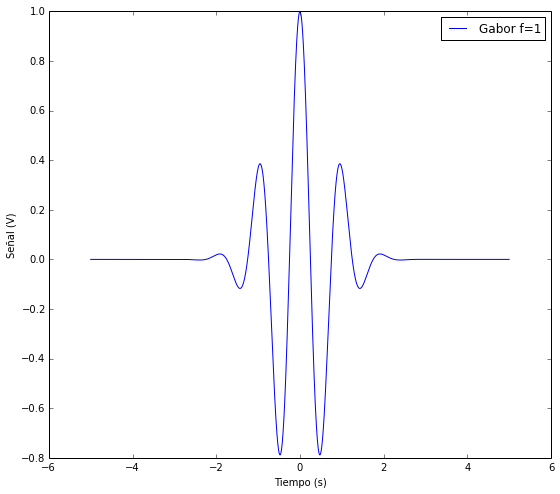

In [7]:
plot(tt, gabor(tt,frec=1), label="Gabor f=1")
xlabel("Tiempo (s)")
ylabel("Señal (V)")
legend(loc="best")

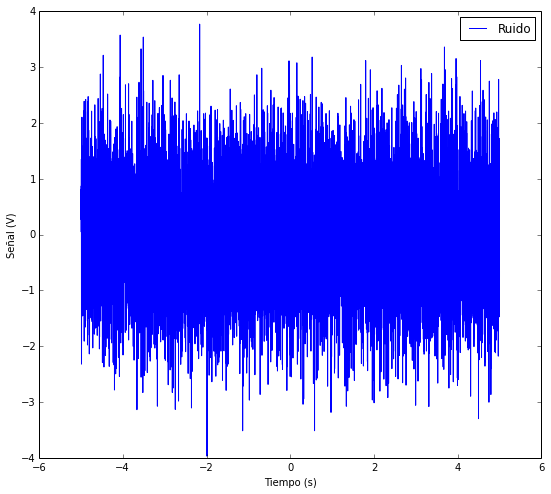

In [8]:
plot(tt, ruido_blanco(tt), label="Ruido")
xlabel("Tiempo (s)")
ylabel("Señal (V)")
legend(loc="best")

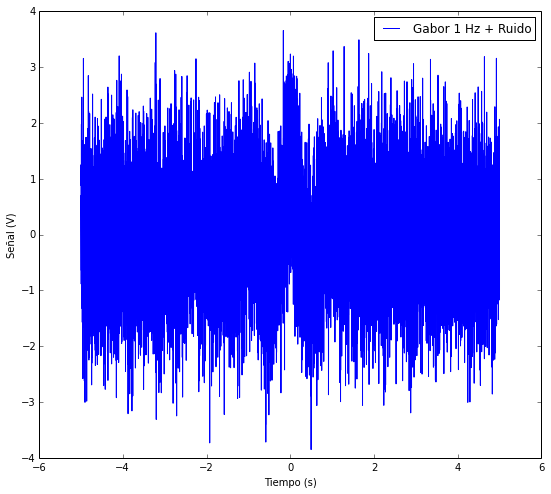

In [9]:
plot(tt, gabor(tt,frec=1) + ruido_blanco(tt), label="Gabor 1 Hz + Ruido")
xlabel("Tiempo (s)")
ylabel("Señal (V)")
legend(loc="best")

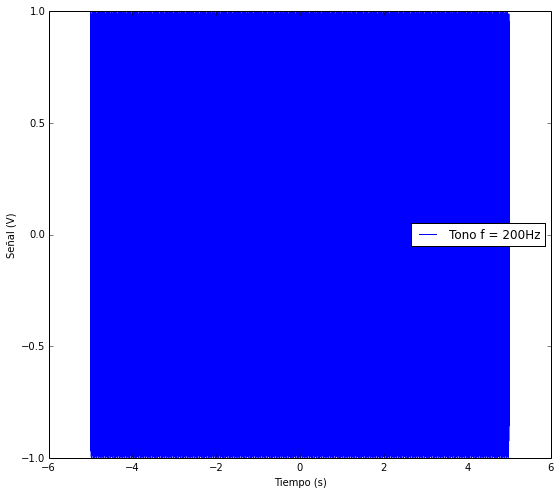

In [10]:
plot(tt, tono(tt,fr=200), label="Tono f = 200Hz")
xlabel("Tiempo (s)")
ylabel("Señal (V)")
legend(loc="best")

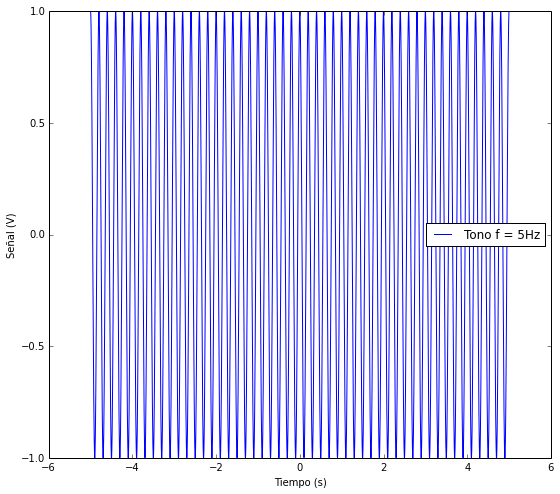

In [11]:
plot(tt, tono(tt,fr=5), label="Tono f = 5Hz")
xlabel("Tiempo (s)")
ylabel("Señal (V)")
legend(loc="best")

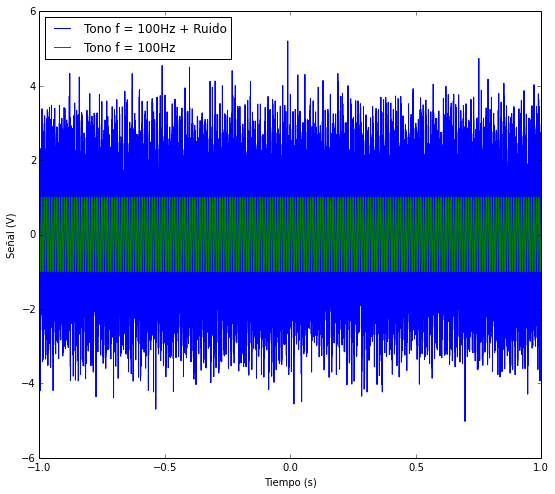

In [28]:
plot(tt, tono(tt,fr=100)+ruido_blanco(tt), label="Tono f = 100Hz + Ruido")
plot(tt, tono(tt,fr=100), label="Tono f = 100Hz")
xlabel("Tiempo (s)")
ylabel("Señal (V)")
legend(loc="best")

Vemos que no podemos observar la señal, a partir de la señal con ruido, probemos con Fourier.

IndexError: index out of bounds

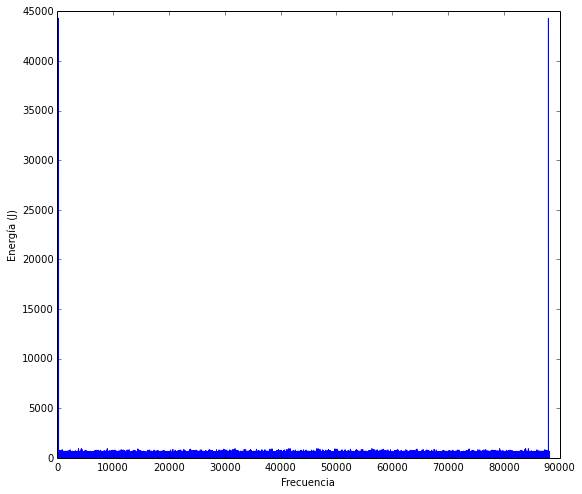

In [32]:
aa = fft.fft(tono(tt,fr=100)+ruido_blanco(tt))
xlabel("Frecuencia")
ylabel("Energía (J)")
plot(abs(aa))
print("Los picos de frecuencia están en:\n+/- {}".format(512-abs(ff[aa.argsort()[-2]])))

# Clase 03-02-15

In [14]:
tt = base_tiempos(0,1)
ss = tono(tt)
st = ruido_blanco(tt)

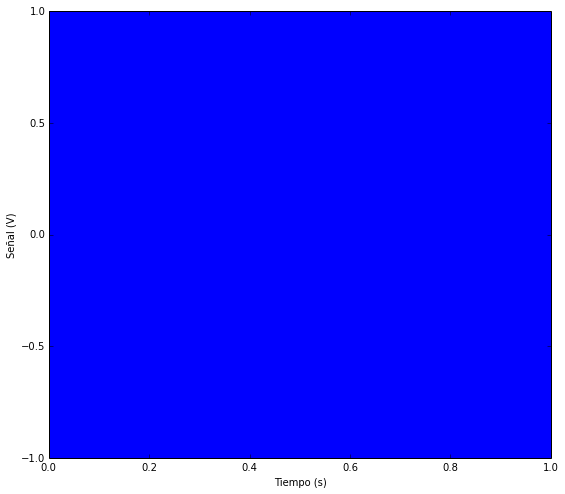

In [15]:
xlabel("Tiempo (s)")
ylabel("Señal (V)")
plot(tt,ss)

In [16]:
fs = fft.fft([1,1,1,1,1,1,1,1]) #Te da los coeficientes de la transformada, PERO * len()
fn = fs/len(fs)
fn

array([ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j])

In [17]:
#Coseno
Fn = fft.fft((1,0,-1,0))/4 #La frecuencia del coseno es la misma que la del muestreo
# [0*w0,1*w0 = -3 * w0,2*w0 = -2* w0 ,3*w0 = -1*w0]

In [18]:
Fn = fft.fft((1,-1,1,-1))/4 #La frecuencia del coseno es el doble que la del muestreo
Fn #2*w0 es el no nulo

array([ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j])

In [19]:
Fn = fft.fft((0,1,0,-1))/4 #La frecuencia del seno es la misma que la del muestreo
Fn

array([ 0.+0.j ,  0.-0.5j,  0.+0.j ,  0.+0.5j])

In [20]:
Fn = fft.fft((0,0,0,0))/4 #La frecuencia del seno es el doble que la del muestreo
Fn

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])

Un seno del doble de la frecuencia del muestreo, no se puede ver

In [21]:
#Tenemos una destrucción de información: Aliasing (Los coeficientes se anulan)

# Clase 4-03-15

Frecuencia fundamental: $$\omega_0$$
Período de análisis: $$T$$

$$\omega_0 = \frac{2\pi}{T}$$

La fft (Fast Fourier Transform) en te da el mismo número de coeficientes que muestras en el periodo de análisis.

Los picos de frecuencia están en:
0.9999773242630385*w0 
-0.9999773242630385*w0


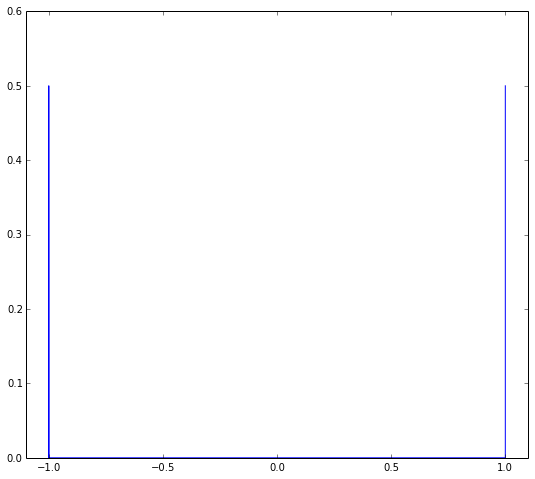

In [22]:
tt = base_tiempos(-1,1,44100)
ss = cos(np.pi*tt)

Fn = fft.fft(ss)/len(ss)
plot(tt,abs(Fn))
xlim(-1.1,1.1)

print("Los picos de frecuencia están en:\n{}*w0 \n{}*w0".format(tt[abs(Fn).argsort()[-2]],tt[abs(Fn).argsort()[-1]]))